| [03_data_science/10_Scikit-Learn聚类.ipynb](https://github.com/shibing624/python-tutorial/blob/master/03_data_science/10_Scikit-Learn聚类.ipynb)  | Scikit-Learn聚类  |[Open In Colab](https://colab.research.google.com/github/shibing624/python-tutorial/blob/master/03_data_science/10_Scikit-Learn聚类.ipynb) |

# 聚类：Cluster

测试数据演示聚类：

In [1]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=10).fit(X)
kmeans.labels_    # array([0, 0, 0, 1, 1, 1], dtype=int32)

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [2]:
kmeans.predict([[0, 0], [5, 4]])   # array([0, 1], dtype=int32)

array([1, 0], dtype=int32)

In [3]:
kmeans.cluster_centers_   # array([[1., 2.], [4., 2.]])

array([[4., 2.],
       [1., 2.]])

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, 
                  n_features=2,
                  centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2],
                  random_state=9)
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

X为样本特征，Y为样本簇类别，共1000个样本，

每个样本4个特征，共4个簇，簇中心在[-1,-1], [0,0], [1,1], [2,2],
簇方差分别为[0.4, 0.2, 0.2]

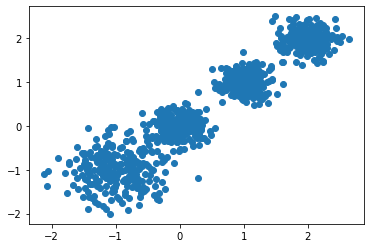

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

## KMeans
使用KMeans聚类：

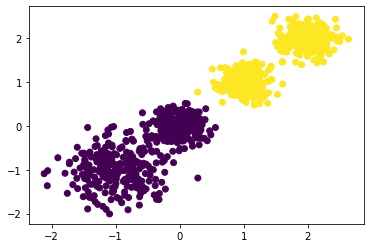

In [7]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [8]:
from sklearn import metrics
metrics.calinski_harabasz_score(X, y_pred)

3116.1706763322227

设置4个簇，n_clusters=4:

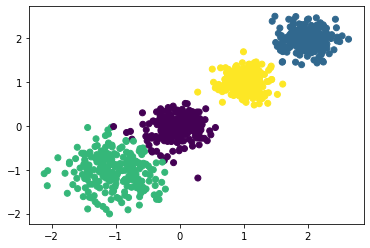

In [9]:
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [10]:
metrics.calinski_harabasz_score(X, y_pred)

5924.050613480169

## MiniBatchKMeans 

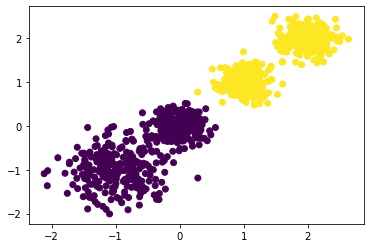

In [11]:
from sklearn.cluster import MiniBatchKMeans
y_pred = MiniBatchKMeans(n_clusters=2, batch_size=200, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [12]:
metrics.calinski_harabasz_score(X, y_pred)

3116.1706763322227

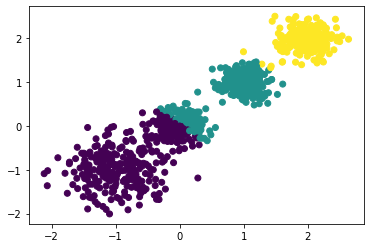

In [13]:
y_pred = MiniBatchKMeans(n_clusters=3, batch_size=200, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [14]:
metrics.calinski_harabasz_score(X, y_pred)

2827.388413921534

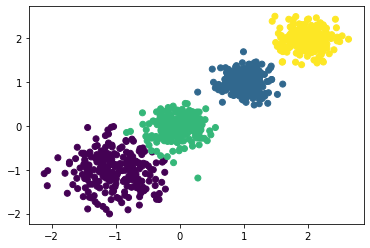

In [15]:
y_pred = MiniBatchKMeans(n_clusters=4, batch_size=200, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [16]:
metrics.calinski_harabasz_score(X, y_pred)

5921.45496000146

n_clusters的选择？

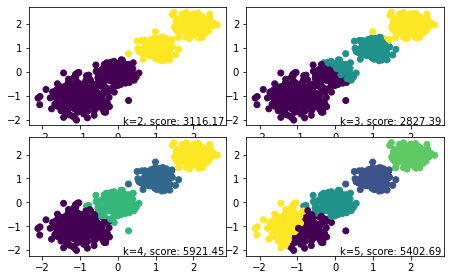

In [17]:
plt.subplots_adjust(left=.02, right=.98, bottom=.096, top=.96, wspace=.1, hspace=.1)

plt.subplot(2, 2, 1)
y_pred = MiniBatchKMeans(n_clusters=2, batch_size=200, random_state=9).fit_predict(X)
score2 = metrics.calinski_harabasz_score(X, y_pred)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=%d, score: %.2f' % (2, score2)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')


plt.subplot(2, 2, 2)
y_pred = MiniBatchKMeans(n_clusters=3, batch_size = 200, random_state=9).fit_predict(X)
score3 = metrics.calinski_harabasz_score(X, y_pred)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=%d, score: %.2f' % (3, score3)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')

plt.subplot(2, 2, 3)
y_pred = MiniBatchKMeans(n_clusters=4, batch_size = 200, random_state=9).fit_predict(X)
score4 = metrics.calinski_harabasz_score(X, y_pred)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=%d, score: %.2f' % (4, score4)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')

plt.subplot(2, 2, 4)
y_pred = MiniBatchKMeans(n_clusters=5, batch_size = 200, random_state=9).fit_predict(X)
score5 = metrics.calinski_harabasz_score(X, y_pred)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=%d, score: %.2f' % (5, score5)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

简化的写法：

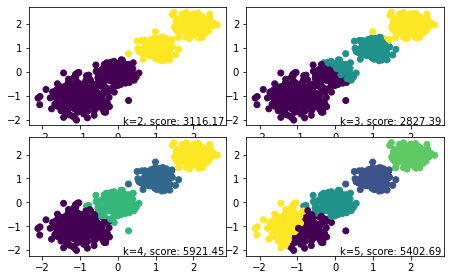

In [18]:
plt.subplots_adjust(left=.02, right=.98, bottom=.096, top=.96, wspace=.1, hspace=.1)
for index, k in enumerate((2, 3, 4, 5)):
    plt.subplot(2, 2, index + 1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size=200, random_state=9).fit_predict(X)
    score = metrics.calinski_harabasz_score(X, y_pred)  
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k, score)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

## 基于经验的k-means初始化方法

评估k均值初始化的方法，以使算法快速收敛，即到最近聚类中心的平方距离之和测量的。


比较K-Means和MiniBatchKMeans算法的聚类效果：

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

random_state = np.random.RandomState(0)

# 每个策略的运行次数（使用随机生成的数据集），以便能够计算标准偏差的估计值
n_runs = 5

# k-means模型可以进行多次随机初始化，以便能够快速收敛
n_init_range = np.array([1, 5, 10, 15, 20])

# 数据生成参数
n_samples_per_center = 100
grid_size = 3
scale = 0.1
n_clusters = grid_size ** 2


def make_data(random_state, n_samples_per_center, grid_size, scale):
    random_state = check_random_state(random_state)
    centers = np.array([[i, j]
                        for i in range(grid_size)
                        for j in range(grid_size)])
    n_clusters_true, n_features = centers.shape

    noise = random_state.normal(
        scale=scale, size=(n_samples_per_center, centers.shape[1]))

    X = np.concatenate([c + noise for c in centers])
    y = np.concatenate([[i] * n_samples_per_center
                        for i in range(n_clusters_true)])
    return shuffle(X, y, random_state=random_state)

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


Text(0.5, 1.0, 'Mean inertia for various k-means init across 5 runs')

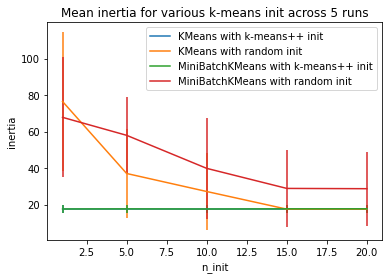

In [20]:
# Part 1: 初始化方法的定量评价

plt.figure()
plots = []
legends = []

cases = [
    (KMeans, 'k-means++', {}),
    (KMeans, 'random', {}),
    (MiniBatchKMeans, 'k-means++', {'max_no_improvement': 3}),
    (MiniBatchKMeans, 'random', {'max_no_improvement': 3, 'init_size': 500}),
]

for factory, init, params in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(n_init_range), n_runs))

    for run_id in range(n_runs):
        X, y = make_data(run_id, n_samples_per_center, grid_size, scale)
        for i, n_init in enumerate(n_init_range):
            km = factory(n_clusters=n_clusters, init=init, random_state=run_id,
                         n_init=n_init, **params).fit(X)
            inertia[i, run_id] = km.inertia_
    p = plt.errorbar(n_init_range, inertia.mean(axis=1), inertia.std(axis=1))
    plots.append(p[0])
    legends.append("%s with %s init" % (factory.__name__, init))

plt.xlabel('n_init')
plt.ylabel('inertia')
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)

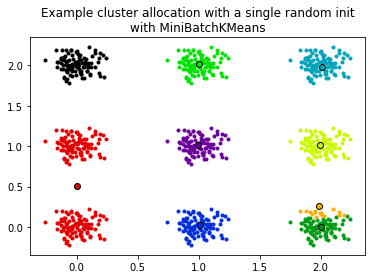

In [21]:
# Part 2: 数据聚类结果的可视化显示

X, y = make_data(random_state, n_samples_per_center, grid_size, scale)
km = MiniBatchKMeans(n_clusters=n_clusters, init='random', n_init=1,
                     random_state=random_state).fit(X)

plt.figure()
for k in range(n_clusters):
    my_members = km.labels_ == k
    color = cm.nipy_spectral(float(k) / n_clusters, 1)
    plt.plot(X[my_members, 0], X[my_members, 1], 'o', marker='.', c=color)
    cluster_center = km.cluster_centers_[k]
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=color, markeredgecolor='k', markersize=6)
    plt.title("Example cluster allocation with a single random init\n"
              "with MiniBatchKMeans")

plt.show()

第一个图显示了最佳初始化参数（``KMeans`` or ``MiniBatchKMeans``）和init方法（``init="random"`` or ``init="kmeans++"``）的选择。

第二个图显示了使用``init="random"`` and ``n_init=1``的``MiniBatchKMeans``一次运行结果。这种运行导致一个坏的收敛（局部最优）。



结论：初始化一致的情况下，K-Means和MiniBatchKMeans算法差别很小。

## 手写体数字的k均值聚类演示

在这个例子中，我们比较k-means的各种初始化策略的运行的效果。

评估聚类效果：

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.17s	69432	0.602	0.650	0.625	0.465	0.621	0.146
random   	0.14s	69694	0.669	0.710	0.689	0.553	0.686	0.147
PCA-based	0.02s	70804	0.671	0.698	0.684	0.561	0.681	0.118
__________________________________________________________________________________


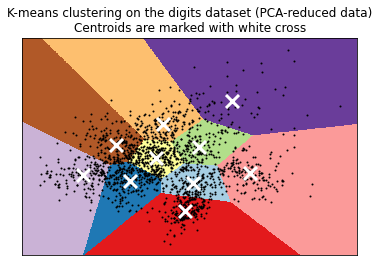

In [22]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()




## 基于K均值的颜色量化
对颐和园图像执行像素矢量量化（VQ），将显示图像所需的颜色数量从96615减少到64，同时保持整体外观质量。


Fitting model on a small sub-sample of the data
done in 0.289s.
Predicting color indices on the full image (k-means)
done in 0.012s.
Predicting color indices on the full image (random)
done in 0.178s.


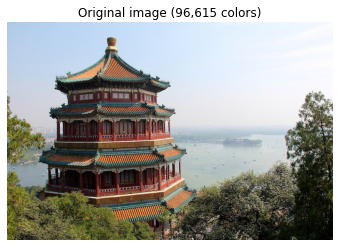

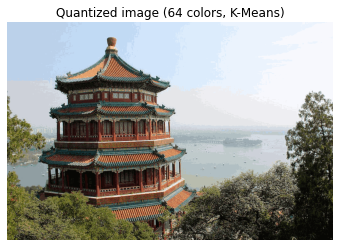

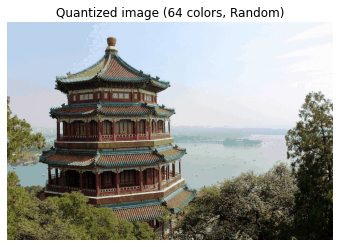

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

可以看到聚类后，用更少的颜色数量达到了跟原图差不多的显示效果，强于随机选择。

本节完。